<a href="https://colab.research.google.com/github/harshithgowdakc/own_projects/blob/main/Processing_image_data_for_Deep_Learninged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
 #importing the dependence
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [91]:
# import images sourse
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [92]:
# importing dependence for deep learning
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [93]:
#loading the MNIST data from keras datset
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [94]:
#checking the data
type(x_train)

numpy.ndarray

In [95]:
#checking shape
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [96]:
#print the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [97]:
print(x_train[10].shape)

(28, 28)


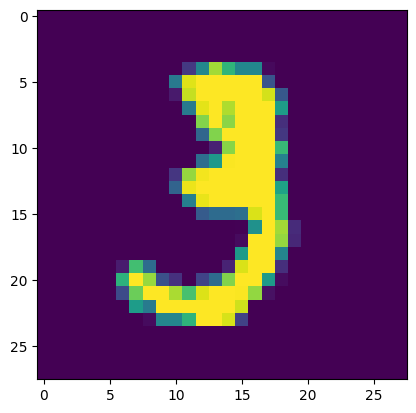

In [98]:
# displaying the image
plt.imshow(x_train[10])

In [99]:
#image labels
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [100]:
# finding unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [101]:
# finding unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [102]:
# Scaling the values
x_train = x_train/255
x_test = x_test/255
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [103]:
# Buliding up neural network
# setting up the layers of a neutal network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [104]:
# compling the neural network
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
# training the neural network
model.fit(x_train,y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3024 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1405 - accuracy: 0.9586
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1034 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0832 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0669 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0568 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0511 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0427 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0381 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.034

In [106]:
#accuracy on test data
loss_accuracy = model.evaluate(x_test,y_test)
print(loss_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9728
[0.10391440242528915, 0.9728000164031982]


In [107]:
print(x_test.shape)

(10000, 28, 28)


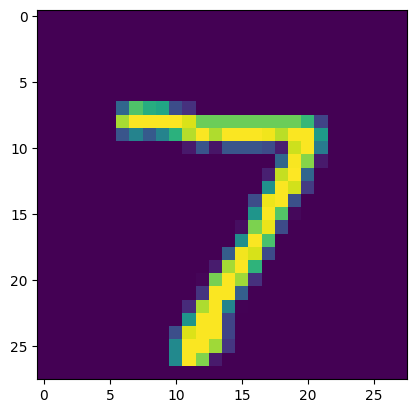

In [108]:
# first datapoint in x_test
plt.imshow(x_test[0])
plt.show()

In [109]:
print(y_test[0])

7


In [110]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [111]:
print(y_pred[0])

[4.0561997e-07 3.8857089e-04 4.4759732e-01 9.8667902e-01 1.3500279e-07
 2.2901814e-02 7.7648117e-08 9.9999934e-01 2.3078388e-02 7.3378795e-01]


In [112]:
# converting the predication probability to class label
label_for_firsttest_image = np.argmax(y_pred[0])
print(label_for_firsttest_image)

7


In [113]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [114]:
print(y_pred_label[0])

7


tf.Tensor(
[[ 960    0    2    1    1    6    3    1    4    2]
 [   0 1119    2    3    0    1    2    1    7    0]
 [   0    3 1005    8    0    0    0    3   11    2]
 [   0    0    3  976    0   17    0    4    6    4]
 [   1    2    2    1  946    5    1    2    2   20]
 [   2    0    0    4    1  878    3    1    2    1]
 [   3    3    0    1    2   11  934    0    4    0]
 [   0    4   11    5    1    1    0  991    4   11]
 [   2    0    0    8    4   14    1    5  937    3]
 [   1    2    0    3    5    7    1    5    3  982]], shape=(10, 10), dtype=int32)


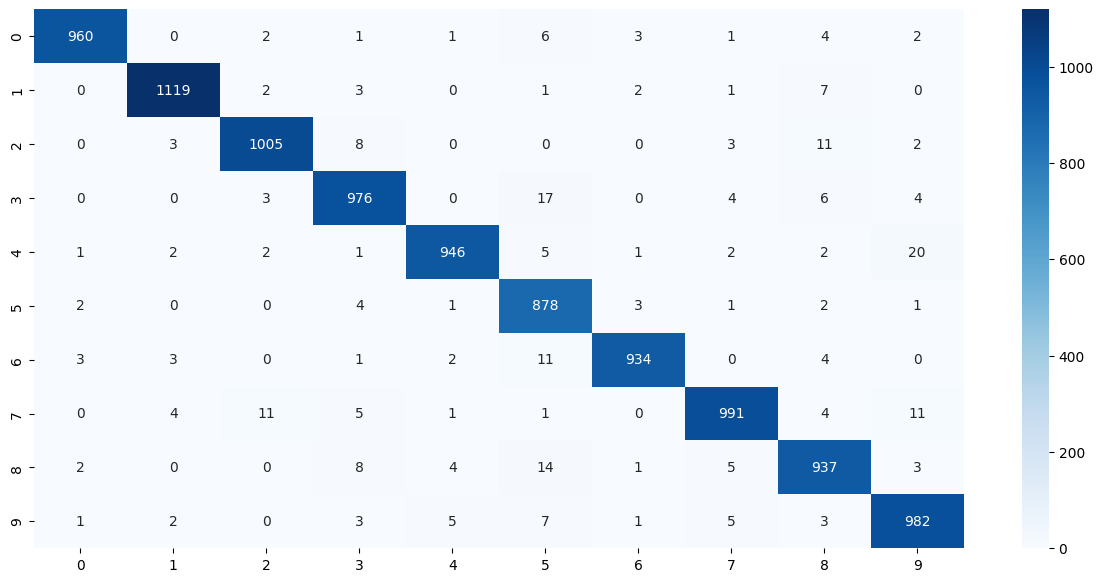

In [115]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_label)
print(conf_mat)

plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.show()

In [116]:
#Bulding a predictive system
input_image_path = "/content/MNIST_44_0.webp"

In [117]:
input_image = cv2.imread(input_image_path)

In [118]:
type(input_image)

numpy.ndarray

In [119]:
print(input_image.shape)

(238, 238, 3)


In [120]:
geryscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [139]:
geryscale.shape

(238, 238)

In [140]:
input_image_res = cv2.resize(geryscale,(28,28))
input_image_res.shape

(28, 28)

In [141]:
print(input_image_res)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 177 211 151  69 149 151  96
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1  44 238 254 254 254 254 254
  254 126   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  34 204 254 254 188 21

In [142]:
input_image_res = input_image_res/255

In [146]:
input_reshape = np.reshape(input_image_res,[1,28,28])

In [147]:
input_prediction = model.predict(input_reshape)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[9.9998349e-01 4.0877823e-04 1.2727866e-01 4.8789565e-02 7.8410164e-07
  3.7739348e-02 1.9529465e-03 4.7624323e-01 1.2683393e-01 6.0579622e-01]]


In [148]:
input_prde_label = np.argmax(input_prediction)
print(input_prde_label)

0
